# EABA INFORMATION PAPER - LCA CASE STUDY

This Jupyter notebook contains the Python script required to perform the LCA study on the Spirulina biorefinery described in the EABA information paper *"Life Cycle Assessment of Algal Products: A Step-by-Step Guide to Application"*. Running this code requires the access to the licensed ecoinvent database (here version 3.9.1 cut-off). 

## Set up the directories

In [1]:
import os
import sys
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wdir = Path().resolve() # get the directory of the notebook
db_dir = wdir.parents[1] / 'Desktop' / 'Databases' ## this needs to be changed depending on where the ecoinvent database is located
db_dir = str(db_dir)
wdir = str(wdir)

In [3]:
# define the initial working directory
pdir = os.path.join(wdir,'projects')
print('Working directory:', wdir)
print('Database directory:', db_dir)

# set the BW project directory
pathlib.Path(pdir).mkdir(parents=True, exist_ok=True)
os.environ['BRIGHTWAY2_DIR'] = pdir
print('Project directory:', os.environ['BRIGHTWAY2_DIR'])

# set the directory to store the results
result_dir = os.path.join(wdir,'results')   
pathlib.Path(result_dir).mkdir(parents=True, exist_ok=True)
print('Results directory:', result_dir)

Working directory: /home/leabraud/Documents/LCA_EABA
Database directory: /home/leabraud/Desktop/Databases
Project directory: /home/leabraud/Documents/LCA_EABA/projects
Results directory: /home/leabraud/Documents/LCA_EABA/results


## Import background databases

In [4]:
import lca_algebraic as alg
#import brightway2 as bw

# initiate the project / choose project name
alg.initProject('lca_wp1') ### NAME OF THE PROJECT CAN BE CHANGED

# import the ecoinvent database from a local directory
# alg.importDb("ei_3.9.1_cutoff", str(db_dir + '/ecoinvent 3.9.1_cutoff_ecoSpold02/datasets')) ## VERSION OF ECOINVENT & DIRECTORY TO BE CHANGED

# overview of the databases
alg.list_databases()

Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCA_EABA/projects
Biosphere database already present!!! No setup is needed


/tmp/ipykernel_31149/3122578045.py:5: DeprecationWarning: DEPRECATED : Use bw2io.import_ecoinvent_release() instead
  alg.initProject('lca_wp1') ### NAME OF THE PROJECT CAN BE CHANGED


,backend,nb_activities,type
name,,,
biosphere3,sqlite,4718,biosphere
ei_3.9.1_cutoff,sqlite,21238,background
Foreground DB,sqlite,28,foreground


## Create foreground databases

In [5]:
USER_DB = 'Foreground DB' ## NAME OF THE FOREGROUND DATABASE CAN BE CHANGED
alg.resetDb(USER_DB)
alg.resetParams()

[WARNING] Db Foreground DB was here. Reseting it


In [6]:
ei = 'ei_3.9.1_cutoff'

In [7]:
### infrastructures
nylon = alg.findActivity(name='market for nylon 6', loc = 'RER', db_name=ei)
polystyrene = alg.findActivity(name='market for polystyrene foam slab for perimeter insulation', loc = 'GLO', db_name=ei)
polyvinylchloride = alg.findActivity(name='market for polyvinylchloride, emulsion polymerised', loc = 'GLO', db_name=ei)
steel_low_alloyed = alg.findActivity(name='market for steel, low-alloyed', loc = 'GLO', db_name=ei)
polyurethane = alg.findActivity(name='market for polyurethane, rigid foam', loc = 'RER', db_name=ei)
pumice = alg.findActivity(name='market for pumice', loc = 'GLO', db_name=ei)
concrete = alg.findActivity(name='market for concrete block', loc = 'DE', db_name=ei)
ceramic_tile = alg.findActivity(name='market for ceramic tile', loc = 'GLO', db_name=ei)
sand = alg.findActivity(name='market for sand', loc = 'CH', db_name=ei)
polyethylene = alg.findActivity(name='market for polyethylene terephthalate, granulate, amorphous', loc = 'GLO', db_name=ei)
polypropylene = alg.findActivity(name='market for polypropylene, granulate', loc = 'GLO', db_name=ei)
polyvinylchloride = alg.findActivity(name='market for polyvinylchloride, emulsion polymerised', loc = 'GLO', db_name=ei)
polyethylene_high_density = alg.findActivity(name='market for polyethylene, high density, granulate', loc = 'GLO', db_name=ei)
polycarbonate = alg.findActivity(name='market for polycarbonate', loc = 'GLO', db_name=ei)

# Spirulina cultivation and biomass processing
sodium_hypochlorite = alg.findActivity(name='market for sodium hypochlorite, without water, in 15% solution state', loc = 'RER', db_name=ei)
waste_paperboard_IT = alg.findActivity(name='market for waste paperboard', loc = 'IT', db_name=ei)
municipal_solid_waste_IT = alg.findActivity(name='market for municipal solid waste', loc = 'IT', db_name=ei)
sodium_bicarbonate = alg.findActivity(name='market for sodium bicarbonate', loc = 'GLO', db_name=ei)
potassium_nitrate = alg.findActivity(name='market for potassium nitrate', loc = 'RER', db_name=ei)
magnesium_sulfate = alg.findActivity(name='market for magnesium sulfate', loc = 'GLO', db_name=ei)
chelated_iron = alg.findActivity(name='market for EDTA, ethylenediaminetetraacetic acid', loc = 'GLO', db_name=ei)
ammonium_phosphate = alg.findActivity(name='monoammonium phosphate production', loc = 'RER', db_name=ei)
electricity_IT = alg.findActivity(name='market for electricity, medium voltage', loc = 'IT', db_name=ei)
ground_water = alg.findActivity(name='tap water production, underground water without treatment', loc = 'Europe without Switzerland', db_name=ei)
waste_plastic_IT = alg.findActivity(name='market for waste plastic, mixture', loc = 'IT', db_name=ei)
polyethylene = alg.findActivity(name='market for polyethylene terephthalate, granulate, amorphous', loc = 'GLO', db_name=ei)
transport_car = alg.findActivity(name='market for transport, passenger car, large size, petrol, EURO 3', loc = 'GLO', db_name=ei)
transport_ship = alg.findActivity(name='market for transport, freight, sea, container ship', loc = 'GLO', db_name=ei)
transport_lorry = alg.findActivity(name='market for transport, freight, lorry, unspecified', loc = 'RER', db_name=ei)
electricity_FR = alg.findActivity(name='market for electricity, medium voltage', loc = 'FR', db_name=ei)
tap_water = alg.findActivity(name='market for tap water', loc = 'Europe without Switzerland', db_name=ei) 
sodium_hydroxide = alg.findActivity(name='market for sodium hydroxide, without water, in 50% solution state', loc = 'GLO', db_name=ei) 
hydrogen_peroxide = alg.findActivity(name='market for hydrogen peroxide, without water, in 50% solution state', loc = 'RER', db_name=ei) 
ultrapure_water = alg.findActivity(name='market for water, ultrapure', loc = 'RER', db_name=ei) 
cellulose_filters = alg.findActivity(name='market for sulfate pulp, bleached', loc = 'RER', db_name=ei) 
natural_gas = alg.findActivity(name='market for natural gas, high pressure', loc = 'FR', db_name=ei) 
waste_plastic_FR = alg.findActivity(name='market for waste plastic, mixture', loc = 'FR', db_name=ei) 
waste_paperboard_FR = alg.findActivity(name='market for waste paperboard', loc = 'FR', db_name=ei) 
sulfuric_acid = alg.findActivity(name='market for sulfuric acid', loc = 'RER', db_name=ei) 
potassium_hydroxide = alg.findActivity(name='market for potassium hydroxide', loc = 'GLO', db_name=ei) 
nitric_acid = alg.findActivity(name='market for nitric acid, without water, in 50% solution state', loc = 'RER w/o RU', db_name=ei) 
wastewater = alg.findActivity(name='treatment of wastewater, average, wastewater treatment', loc = 'Europe without Switzerland', unit = 'cubic meter',db_name=ei) 

In [8]:
infrastructures = alg.newActivity(db_name = USER_DB, 
    name = 'infrastructures',
    unit = 'unit',
    exchanges={nylon:0, 
               polystyrene:1.07441095890411,
               polyvinylchloride: 0.956219178082192 + 1.00119863013699,
               steel_low_alloyed: 0.126995890410959,
               polyurethane: 0.390738904109589,
               pumice: 0.806164383561644,
               concrete: 1.21195890410959,
               ceramic_tile: 0.419178082191781,
               sand: 3.53835616438356,
               polyethylene: 0.206153424657534 + 0.779041095890411,
               polypropylene: 0.0933698630136986,
               polyethylene_high_density: 0.567123287671233 + 0.11493698630137,
               polycarbonate: 0.0849315068493151
              })

In [9]:
operation = alg.newActivity(db_name = USER_DB, 
    name = 'operation',
    unit = 'unit',
    exchanges={electricity_IT:38.203893,
               ground_water: 3460.00328767123,
               waste_plastic_IT: -0.22,
               waste_paperboard_IT: -0.08,
               municipal_solid_waste_IT: -0.22,
               sodium_hypochlorite:0.009075               
              })

In [10]:
cultivation = alg.newActivity(db_name = USER_DB, 
    name = 'cultivation',
    unit = 'unit',
    exchanges={sodium_bicarbonate: 39.87,
               potassium_nitrate: 45.53,
               magnesium_sulfate: 0.68,
               chelated_iron: 0.31, 
               ammonium_phosphate: 0.51,
               electricity_IT: 94.96,
               ground_water: 12858.29,
               waste_plastic_IT: -0.12})

In [11]:
harvesting_drying = alg.newActivity(db_name = USER_DB, 
    name = 'harvesting_drying',
    unit = 'unit',
    exchanges={electricity_IT: 204.96,
               ground_water: 1671.49,
               wastewater:-0.84})

In [12]:
packaging = alg.newActivity(db_name = USER_DB, 
    name = 'packaging',
    unit = 'unit',
    exchanges={polyethylene: 0.35})

In [13]:
transport = alg.newActivity(db_name = USER_DB, 
    name = 'transport',
    unit = 'unit',
    exchanges={transport_car: 0.38,
               transport_ship: 16.87,
               transport_lorry: 0.63})

In [14]:
phycocyanin_extraction = alg.newActivity(db_name = USER_DB, 
    name = 'phycocyanin_extraction',
    unit = 'unit',
    exchanges={electricity_FR: 739.10,
               tap_water: 15513.23,
               sodium_hydroxide: 10.88,
               hydrogen_peroxide: 0.17,
               nitric_acid: 9.92,
               ultrapure_water: 26.57,
               cellulose_filters: 22.48,
               natural_gas: 414.65,
               waste_plastic_FR: -0.21,
               wastewater: -10.07,
               waste_paperboard_FR: -22.48})

In [15]:
coproductA_treatment = alg.newActivity(db_name = USER_DB, 
    name = 'coproductA_treatment',
    unit = 'unit',
    exchanges={electricity_FR: 269.42,
               tap_water: 2115.62,
               sulfuric_acid: 2.31,
               ultrapure_water: 2.86,
               sodium_hydroxide: 0.84,
               potassium_hydroxide: 1.15, 
               wastewater: -2.02})

In [16]:
EF = [m for m in alg.findMethods('EF v3.0') if 'EN15804' not in str(m[0]) and 'no LT' not in str(m[0])]

EF_name = { ('EF v3.0', 'acidification', 'accumulated exceedance (AE)'):'AE',
            ('EF v3.0', 'climate change', 'global warming potential (GWP100)'):'GWP100',
            ('EF v3.0', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)'):'ETf',
            ('EF v3.0', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels'): 'ADPf',
            ('EF v3.0', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)'): 'FE',
            ('EF v3.0', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)'): 'ME',
            ('EF v3.0', 'eutrophication: terrestrial', 'accumulated exceedance (AE)'): 'TE',
            ('EF v3.0', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)'): 'HTnc',
            ('EF v3.0', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)'): 'HTc',
            ('EF v3.0', 'ionising radiation: human health', 'human exposure efficiency relative to u235'): 'IR',
            ('EF v3.0', 'land use', 'soil quality index'): 'LU',
            ('EF v3.0', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)'):'ADPm',
            ('EF v3.0', 'ozone depletion', 'ozone depletion potential (ODP)'): 'ODP',
            ('EF v3.0', 'particulate matter formation', 'impact on human health'): 'PMF',
            ('EF v3.0', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase'): 'POF',
            ('EF v3.0', 'water use', 'user deprivation potential (deprivation-weighted water consumption)'): 'WU'}

In [17]:
new_names = {'infrastructures': 'Infrastructures',
             'operation': 'Operation',
             'cultivation': 'Cultivation',
             'harvesting_drying': 'Harvesting & Drying',
             'packaging': 'Packaging',
             'transport': 'Transport',
             'phycocyanin_extraction': 'Phycocyanin Extraction',
             'coproductA_treatment': 'Coproduct A Treatment'
}

## Calculation of the environmental impacts using FU3

In [18]:
impacts_FU3 = alg.compute_impacts([infrastructures, 
                                   operation, 
                                   cultivation, 
                                   harvesting_drying, 
                                   packaging, transport, 
                                   phycocyanin_extraction, 
                                   coproductA_treatment],
                                   list(EF_name.keys()))
impacts_FU3.loc['total'] = impacts_FU3.sum()
impacts_FU3.T

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia


,infrastructures,operation,cultivation,harvesting_drying,packaging,transport,phycocyanin_extraction,coproductA_treatment,total
acidification - accumulated exceedance (AE)[mol H+-Eq],0.0861733,0.0576116,1.2966,0.29632,0.00482795,0.00604396,1.26579,0.151356,3.16472
climate change - global warming potential (GWP100)[kg CO2-Eq],19.6172,16.8376,177.09,85.3846,1.15886,0.456438,417.305,27.4111,745.261
ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)[CTUe],436.092,186.269,"65,925",949.376,19.4854,6.85764,"8,245.07","3,454.3","79,222.4"
"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",415.735,256.622,"2,295.99","1,320.41",25.5273,5.7924,"26,815.7","3,208.09","34,343.9"
eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg P-Eq],0.00391577,0.00287621,0.044335,0.0142098,0.000224249,3.48679e-05,0.057451,0.00907748,0.132124
eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],0.0176462,0.0106079,0.185017,0.0663217,0.000964585,0.00154794,0.554046,0.0694284,0.90558
eutrophication: terrestrial - accumulated exceedance (AE)[mol N-Eq],0.17273,0.111397,3.72321,0.576199,0.00973263,0.0169643,3.82073,0.266399,8.69737
human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)[CTUh],4.98919e-07,1.14411e-07,5.24094e-06,6.23806e-07,1.59941e-08,5.22577e-09,4.46618e-06,6.66121e-07,1.16316e-05
human toxicity: carcinogenic - comparative toxic unit for human (CTUh)[CTUh],3.60194e-08,4.9764e-09,1.39208e-07,2.51877e-08,7.15948e-10,2.92263e-10,2.32509e-07,2.41711e-08,4.6308e-07
ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],0.903413,2.28445,11.2242,10.7444,0.0481968,0.00661863,399.517,142.725,567.453


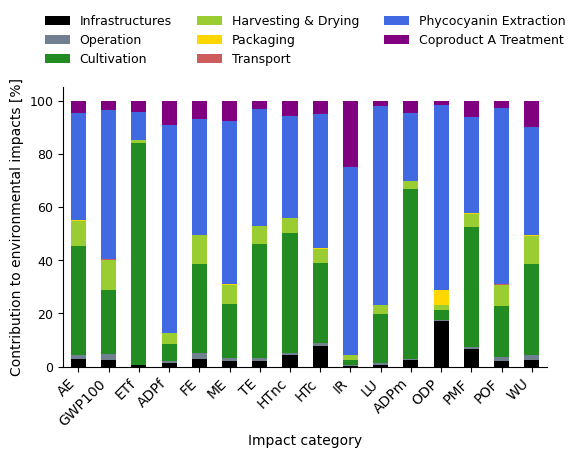

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess data
total_row = impacts_FU3.loc['total']
df_no_total = impacts_FU3.drop('total')
df_no_total = df_no_total.rename(index=new_names)

df_normalized = df_no_total.div(total_row, axis=1)
df_percent = df_normalized.T * 100  # Transpose & convert to percentage
df_percent.index = EF_name.values()

# Plot
fig, ax = plt.subplots(figsize=(6, 5))  # Suitable for 2-column paper

# Use colorblind-friendly colormap
#colors = plt.get_cmap('tab10').colors[:len(df_percent.columns)]
colors = ['black', 'slategrey','forestgreen', 'yellowgreen', 'gold', 'indianred', 'royalblue','purple'] 

df_percent.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Formatting
ax.set_ylabel('Contribution to environmental impacts [%]', fontsize=10)
ax.set_xlabel('Impact category', fontsize=10)
ax.set_xticks(range(len(df_percent.index)))
ax.set_xticklabels(df_percent.index, rotation=45, ha='right', fontsize=10)
ax.tick_params(axis='y', labelsize=9)

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend formatting
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
                   ncol=3, frameon=False, fontsize=9, title_fontsize=9)

plt.tight_layout()
plt.savefig('contribution_analysis_WP1.jpeg')
plt.show()

In [20]:
df_no_total.T.to_excel('results_FU3.xlsx')

## Calculation of the environmental impacts using FU1

In [21]:
scaled_infrastructures_FU1 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_infrastructures_FU1',
    unit = 'unit',
    exchanges={infrastructures: 1/28.78})

scaled_operation_FU1 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_operation_FU1',
    unit = 'unit',
    exchanges={operation: 1/28.78})

scaled_cultivation_FU1 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_cultivation_FU1',
    unit = 'unit',
    exchanges={cultivation: 1/28.78})

scaled_harvesting_drying_FU1 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_harvesting_drying_FU1',
    unit = 'unit',
    exchanges={harvesting_drying: 1/28.78})

scaled_packaging_FU1 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_packaging_FU1',
    unit = 'unit',
    exchanges={packaging: 1/28.78})

impacts_FU1 = alg.compute_impacts([scaled_infrastructures_FU1,
                                   scaled_operation_FU1,
                                   scaled_cultivation_FU1, 
                                   scaled_harvesting_drying_FU1, 
                                   scaled_packaging_FU1],
                                   list(EF_name.keys()))
impacts_FU1.loc['total'] = impacts_FU1.sum()
impacts_FU1.T

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia


,scaled_infrastructures_FU1,scaled_operation_FU1,scaled_cultivation_FU1,scaled_harvesting_drying_FU1,scaled_packaging_FU1,total
acidification - accumulated exceedance (AE)[mol H+-Eq],0.00299421,0.00200179,0.045052,0.010296,0.000167754,0.0605118
climate change - global warming potential (GWP100)[kg CO2-Eq],0.681625,0.585046,6.15324,2.9668,0.0402662,10.427
ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)[CTUe],15.1526,6.47218,"2,290.65",32.9873,0.677048,"2,345.94"
"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",14.4453,8.91667,79.7774,45.8794,0.886982,149.906
eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg P-Eq],0.000136059,9.99378e-05,0.00154048,0.000493739,7.79184e-06,0.00227801
eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],0.000613142,0.000368587,0.00642867,0.00230444,3.35158e-05,0.00974835
eutrophication: terrestrial - accumulated exceedance (AE)[mol N-Eq],0.00600173,0.00387065,0.129368,0.0200208,0.000338173,0.159599
human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)[CTUh],1.73356e-08,3.97536e-09,1.82104e-07,2.1675e-08,5.55737e-10,2.25645e-07
human toxicity: carcinogenic - comparative toxic unit for human (CTUh)[CTUh],1.25154e-09,1.72912e-10,4.83698e-09,8.75181e-10,2.48766e-11,7.16149e-09
ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],0.0313903,0.0793764,0.389999,0.37333,0.00167466,0.87577


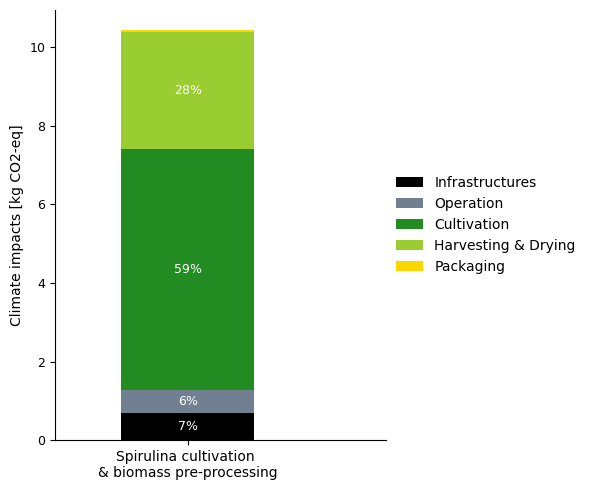

In [22]:
df_GWP = impacts_FU1['climate change - global warming potential (GWP100)[kg CO2-Eq]']
df_GWP = df_GWP.drop('total')
df_GWP = pd.DataFrame(df_GWP).T
df_GWP.columns = ['Infrastructures', 'Operation', 'Cultivation', 'Harvesting & Drying', 'Packaging']

colors = ['black', 'slategrey','forestgreen', 'yellowgreen', 'gold', 'indianred', 'royalblue','purple'] 

fig, ax = plt.subplots(figsize=(6, 5))

# stack the bar manually to be able to adjust location of the bar 
bottom = 0
x = 0.4  # change this value to move bar closer to y-axis
width = 0.4
totals = df_GWP.sum(axis=1).values[0]

for i, col in enumerate(df_GWP.columns):
    value = df_GWP.iloc[0, i]
    ax.bar(x, value, bottom=bottom, color=colors[i], width=width, label=col)

    # Add percentage labels
    pct = value / totals * 100
    if pct > 2:
        ax.text(x, bottom + value / 2, f'{pct:.0f}%', ha='center', va='center', fontsize=9, color='white')
    bottom += value

ax.set_ylabel('Climate impacts [kg CO2-eq]', fontsize=10)
ax.set_xlim(0, 1)  # Controls bar's horizontal position
ax.set_xticks([x])
ax.set_xticklabels(['Spirulina cultivation \n& biomass pre-processing'], fontsize=10)
ax.tick_params(axis='y', labelsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend(
    loc='center left',
    bbox_to_anchor=(0.99, 0.5),
    frameon=False,
    fontsize=10,
    title_fontsize=9,
    ncol=1
)

plt.tight_layout()
plt.savefig('stacked_GWP100_FU1.jpeg', dpi=300, bbox_inches='tight')
plt.show()

## Contribution analysis per main input/outputs: energy, chemicals, water, wastes, others

In [23]:
energy = alg.newActivity(db_name = USER_DB, 
    name = 'energy',
    unit = 'unit',
    exchanges={ electricity_IT:38.203893+94.96+204.96,
                electricity_FR: 739.10+269.42,
                natural_gas: 414.65,})

In [24]:
materials = alg.newActivity(db_name = USER_DB, 
    name = 'materials',
    unit = 'unit',
    exchanges={nylon:0, 
               polystyrene:1.07441095890411,
               polyvinylchloride: 0.956219178082192 + 1.00119863013699,
               steel_low_alloyed: 0.126995890410959,
               polyurethane: 0.390738904109589,
               pumice: 0.806164383561644,
               concrete: 1.21195890410959,
               ceramic_tile: 0.419178082191781,
               sand: 3.53835616438356,
               polyethylene: 0.206153424657534 + 0.779041095890411 + 0.35,
               polypropylene: 0.0933698630136986,
               polyethylene_high_density: 0.567123287671233 + 0.11493698630137,
               polycarbonate: 0.0849315068493151,
               cellulose_filters: 22.48})

In [25]:
nutrients = alg.newActivity(db_name = USER_DB, 
    name = 'nutrients',
    unit = 'unit',
    exchanges={sodium_bicarbonate: 39.87,
               potassium_nitrate: 45.53,
               magnesium_sulfate: 0.68,
               chelated_iron: 0.31, 
               ammonium_phosphate: 0.51})

In [26]:
water = alg.newActivity(db_name = USER_DB, 
    name = 'water',
    unit = 'unit',
    exchanges={ ground_water: 3460.00328767123+12858.29+1671.49,
                tap_water: 15513.23+2115.62,
                ultrapure_water: 26.57+2.86})

In [27]:
wastes = alg.newActivity(db_name = USER_DB, 
    name = 'wastes',
    unit = 'unit',
    exchanges={waste_plastic_IT: -(0.22+0.12),
               waste_paperboard_IT: -0.08,
               municipal_solid_waste_IT: -0.22,
               wastewater:-(0.84+10.07+2.02),
               waste_plastic_FR: -0.21,
               waste_paperboard_FR: -22.48})

In [28]:
chemicals = alg.newActivity(db_name = USER_DB, 
    name = 'chemicals',
    unit = 'unit',
    exchanges={sodium_hypochlorite:0.009075,
               sodium_hydroxide: 10.88+0.84,
               hydrogen_peroxide: 0.17,
               nitric_acid: 9.92,
               sulfuric_acid: 2.31,
               potassium_hydroxide: 1.15})

In [29]:
transport = alg.newActivity(db_name = USER_DB, 
    name = 'transport',
    unit = 'unit',
    exchanges={transport_car: 0.38,
               transport_ship: 16.87,
               transport_lorry: 0.63})

[WARNING] Activity 'transport' was already in 'Foreground DB'. Overwriting it


In [30]:
impacts_per_input_FU3 = alg.compute_impacts([energy,
                                   nutrients,
                                   materials,
                                   chemicals, 
                                   water, 
                                   wastes,
                                   transport],
                                   list(EF_name.keys()))
impacts_per_input_FU3.loc['total'] = impacts_per_input_FU3.sum()
impacts_per_input_FU3.T

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia


,energy,nutrients,materials,chemicals,water,wastes,transport,total
acidification - accumulated exceedance (AE)[mol H+-Eq],1.5429,1.15089,0.166725,0.225217,0.0434223,0.029522,0.00604396,3.16472
climate change - global warming potential (GWP100)[kg CO2-Eq],519.465,135.711,29.4869,29.7003,8.37692,22.0649,0.456438,745.261
ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)[CTUe],"9,166.85","65,475.5",696.741,"3,131.53",154.496,590.437,6.85764,"79,222.4"
"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]","31,545.4","1,645.19",566.113,364.87,160.356,56.1905,5.7924,"34,343.9"
eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg P-Eq],0.0544742,0.0366742,0.00749744,0.00935199,0.00731414,0.0167775,3.48679e-05,0.132124
eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],0.406066,0.159527,0.0440637,0.0310972,0.0089889,0.254289,0.00154794,0.90558
eutrophication: terrestrial - accumulated exceedance (AE)[mol N-Eq],4.06109,3.44329,0.409942,0.587247,0.0781832,0.100651,0.0169643,8.69737
human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)[CTUh],4.00563e-06,4.95641e-06,6.79191e-07,6.07505e-07,3.852e-07,9.92438e-07,5.22577e-09,1.16316e-05
human toxicity: carcinogenic - comparative toxic unit for human (CTUh)[CTUh],2.33521e-07,1.26962e-07,4.5746e-08,1.76332e-08,2.57332e-08,1.31922e-08,2.92263e-10,4.6308e-07
ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],552.773,5.16949,2.35368,2.56871,3.73924,0.84277,0.00661863,567.453


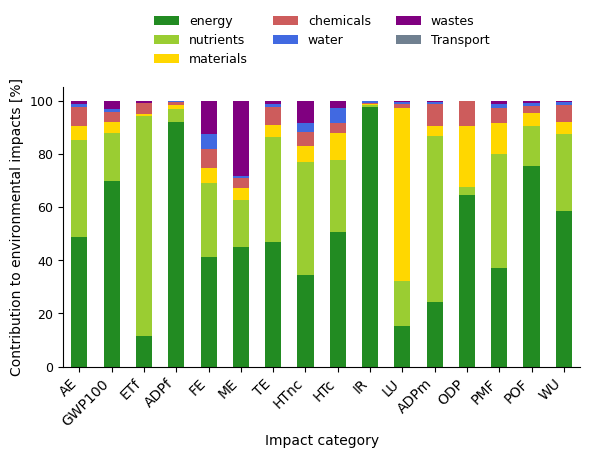

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess data
total_row = impacts_per_input_FU3.loc['total']
df_no_total = impacts_per_input_FU3.drop('total')
df_no_total = df_no_total.rename(index=new_names)

df_normalized = df_no_total.div(total_row, axis=1)
df_percent = df_normalized.T * 100  # Transpose & convert to percentage
df_percent.index = EF_name.values()

fig, ax = plt.subplots(figsize=(6, 5))  # Suitable for 2-column paper

colors = ['forestgreen', 'yellowgreen', 'gold', 'indianred', 'royalblue','purple', 'slategrey'] 


df_percent.plot(kind='bar', stacked=True, ax=ax, color=colors)

ax.set_ylabel('Contribution to environmental impacts [%]', fontsize=10)
ax.set_xlabel('Impact category', fontsize=10)
ax.set_xticks(range(len(df_percent.index)))
ax.set_xticklabels(df_percent.index, rotation=45, ha='right', fontsize=10)
ax.tick_params(axis='y', labelsize=9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
                   ncol=3, frameon=False, fontsize=9, title_fontsize=9)

plt.tight_layout()
plt.savefig('contribution_analysis_per_input_FU3.jpeg')
plt.show()

## Sensitivity analysis on the method to handle multifunctionality (GWP100)

In [32]:
scaled_infrastructures_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_infrastructures_FU2',
    unit = 'unit',
    exchanges={infrastructures: 1/5.70})

scaled_operation_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_operation_FU2',
    unit = 'unit',
    exchanges={operation: 1/5.70})

scaled_cultivation_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_cultivation_FU2',
    unit = 'unit',
    exchanges={cultivation: 1/5.70})

scaled_harvesting_drying_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_harvesting_drying_FU2',
    unit = 'unit',
    exchanges={harvesting_drying: 1/5.70})

scaled_packaging_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_packaging_FU2',
    unit = 'unit',
    exchanges={packaging: 1/5.70})

scaled_transport_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_transport_FU2',
    unit = 'unit',
    exchanges={packaging: 1/5.70})

scaled_phycocyanin_extraction_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_phycocyanin_extraction_FU2',
    unit = 'unit',
    exchanges={phycocyanin_extraction: 1/5.70})

scaled_coproductA_treatment_FU2 = alg.newActivity(db_name = USER_DB, 
    name = 'scaled_coproductA_treatment_FU2',
    unit = 'unit',
    exchanges={coproductA_treatment: 1/5.70})

In [33]:
impacts_FU2 = alg.compute_impacts([scaled_infrastructures_FU2, 
                                   scaled_operation_FU2, 
                                   scaled_cultivation_FU2, 
                                   scaled_harvesting_drying_FU2, 
                                   scaled_packaging_FU2, 
                                   scaled_transport_FU2, 
                                   scaled_phycocyanin_extraction_FU2, 
                                   scaled_coproductA_treatment_FU2],
                                   list(EF_name.keys()))
impacts_FU2.loc['total'] = impacts_FU2.sum()
#impacts_FU2.T

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia


In [34]:
GWP100_total = impacts_FU2.loc['total', 'climate change - global warming potential (GWP100)[kg CO2-Eq]']
GWP100_total

130.87082604808728

In [35]:
GWP100_mass_alloc = GWP100_total*0.62
GWP100_eco_alloc = GWP100_total*0.99

In [36]:
inorganic_fertiliser = alg.findActivity(name='market for inorganic nitrogen fertiliser, as N', loc = 'FR', db_name=ei)

In [37]:
fertiliser_subst = alg.newActivity(db_name = USER_DB, 
    name = 'fertiliser_subst',
    unit = 'unit',
    exchanges={inorganic_fertiliser: -0.61})

In [38]:
impacts_FU2_subst_fert = alg.compute_impacts([fertiliser_subst],list(EF_name.keys()))
impacts_FU2_subst_fert

[INFO] Db changed recently, clearing cache expr
[INFO] Db changed recently, clearing cache lcia


,acidification - accumulated exceedance (AE)[mol H+-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)[CTUe],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg P-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE)[mol N-Eq],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)[CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh)[CTUh],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],ozone depletion - ozone depletion potential (ODP)[kg CFC-11-Eq],particulate matter formation - impact on human health[disease incidence],photochemical oxidant formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
fertiliser_subst,-0.0170893,-2.8409,-106.915,-43.5941,-0.000475117,-0.00291628,-0.0501867,-4.01229e-08,-1.85789e-09,-0.142776,-9.61919,-3.67019e-05,-8.38853e-08,-1.32181e-07,-0.0079813,-3.23345


In [39]:
impacts_FU2_subst = alg.compute_impacts([scaled_infrastructures_FU2, 
                                   scaled_operation_FU2, 
                                   scaled_cultivation_FU2, 
                                   scaled_harvesting_drying_FU2, 
                                   scaled_packaging_FU2, 
                                   scaled_transport_FU2, 
                                   scaled_phycocyanin_extraction_FU2, 
                                   scaled_coproductA_treatment_FU2,
                                   #fertiliser_subst
                                    ],
                                   list(EF_name.keys()))
impacts_FU2_subst.loc['total'] = impacts_FU2_subst.sum()

In [40]:
GWP100_total_subst = impacts_FU2_subst.loc['total', 'climate change - global warming potential (GWP100)[kg CO2-Eq]']
GWP100_total_subst

130.87082604808728

In [41]:
GWP100_subst_neg = impacts_FU2_subst_fert.loc['fertiliser_subst','climate change - global warming potential (GWP100)[kg CO2-Eq]']
GWP100_subst_neg

-2.84089817490386

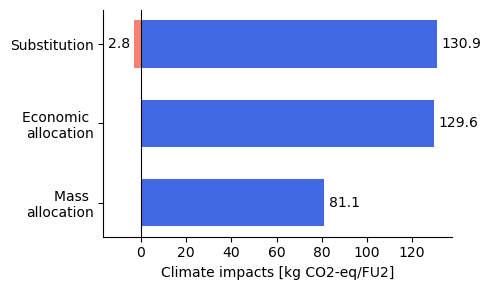

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math  # for ceiling

fig, ax = plt.subplots(figsize=(5, 3)) 

color = 'royalblue'
data_pos = [GWP100_mass_alloc, GWP100_eco_alloc, GWP100_total_subst] # positive values
data_neg = [0,0,GWP100_subst_neg] # negative values
labels = ['Mass \nallocation', 'Economic \nallocation', 'Substitution']

#bars = ax.barh(labels, data, color=color, height=0.35)

# Bar positions
y_pos = np.arange(len(labels))

# Plot positive bars
plt.barh(y_pos, data_pos, color='royalblue', height=0.6)

# Plot negative part (overlap same y positions)
plt.barh(y_pos, data_neg, color='salmon', height=0.6)

# Add a vertical line at x=0 for clarity
plt.axvline(x=0, color='black', linewidth=0.8)

# Rounded value labels
for i in range(len(labels)):
    if data_pos[i]:
        val = round(data_pos[i], 1)
        ax.text(data_pos[i] + 2, y_pos[i], str(val), va='center', ha='left')
    if data_neg[i]:
        val = round(data_neg[i], 1) * -1  # preserve negative sign
        ax.text(data_neg[i] - 2, y_pos[i], str(val), va='center', ha='right')

# Get current x-axis limits
xmin, xmax = ax.get_xlim()

# Extend the left side to add padding before the 0 line
ax.set_xlim(left=xmin - 7)  # or adjust value as needed

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Climate impacts [kg CO2-eq/FU2]', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('climate_impacts_FU2.jpeg')

plt.show()